# Coding a simple decision tree
***

In this worksheet we are going to work with a data set, using the idea of a decision tree class. We are going to simplify the model and use Python code to make a simple decision tree classification model. We will do this for two reasons:<br>

- writing the code is often good for helping to understand what is going on under the bonnet of a library function<br>
- it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements<br>

In this worksheet we are going to code a decision tree which will use the calculated probabilities to make decisions about wheter a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions. It is easier to classify between two values (Iris-virginica or not). Later, using this information, species would be further predicted by probabilities of error.

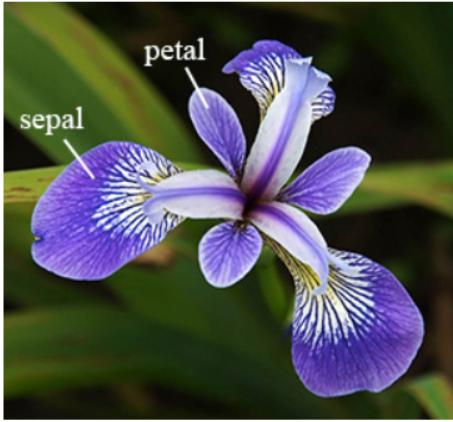

The workflow is:<br>

- divide the data set into 70% of the rows for training and 30% for testing (we can increase the size of the train set later).<br>
- find the median for each of the 4 size columns.<br>
- calculate the proportion of each column that are on or above median that are of a species (ie proportion of petal-lengths on or above median that are Iris-virginica).<br>
- infer the proportion of each that are not of that species (using 1 - proportion above). In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species.<br>
- calculate a Gini Index that will indicate the probability that a prediction will be incorrect.<br>
- use the results of the Gini Index to model a decision tree.<br>
- code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica.<br>
- use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify.<br>
- compare the predicted values against the actual values in the test set - what proportion were predicted correctly?.<br>

This notebook was developed from an initial template given by **Code Canteen** and data scientist Lila Rose. They can be reach at http://futurecoders.org.uk/.

Author of the final document: Ester Giménez Mojón.

### Exercise 1 - investigate the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

Read the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

The columns in the CSV file do not have headings, when you read the file, add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```
*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, median and upper and lower quartile values in each of the columns


This notebook will provide a decision tree for every one of the three different types of Iris considered. Each tree will be independent of each other.

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, names=names)
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris_data.median()

sepal-length    5.80
sepal-width     3.00
petal-length    4.35
petal-width     1.30
dtype: float64

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris_data.tail(10)

,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
max = iris_data.max()
max

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
species         Iris-virginica
dtype: object

In [9]:
min = iris_data.min()
min

sepal-length            4.3
sepal-width             2.0
petal-length            1.0
petal-width             0.1
species         Iris-setosa
dtype: object

In [10]:
upper = iris_data.quantile(0.75)
upper

sepal-length    6.4
sepal-width     3.3
petal-length    5.1
petal-width     1.8
Name: 0.75, dtype: float64

In [11]:
lower = iris_data.quantile(0.25)
lower

sepal-length    5.1
sepal-width     2.8
petal-length    1.6
petal-width     0.3
Name: 0.25, dtype: float64

### Exercise 2 - split the data into train and test sets
---

Split the data set into and 70% train, 30% test, split.


Split the data set into and 80% train, 20% test, split.

In [12]:
# import the train_test_split function
from sklearn.model_selection import train_test_split

# create the classification variables from all columns
train, test = train_test_split(iris_data, test_size=0.20, random_state=2)
# random_state fixes the results of the calculation every time that the whole notebook is run, otherwise it will show
# different results, due to the random test_size, as it will choose different items every time.
train.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,120.000000,120.000000,120.000000,120.000000
mean,5.897500,3.055833,3.862500,1.243333
std,0.813382,0.443401,1.741344,0.753115
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.400000,3.325000,5.100000,1.825000
max,7.900000,4.400000,6.900000,2.500000


The splitting will be used later, to see if the remaining data (the test set) relates very well with the train set. </br>

In order to manage decision trees, we need to decide which item we will use as a discriminator for separating values above and below it. We can use the median, the mean, quartiles (25 or 75).</br>

We will begin with the median. </br>

1. We calculate the general median of every column with the complete set of data (iris_data).<br>
2. We calculate the probability in every column, of how many items are above or below the calculated median.<br>
3. We calculate the condicional probability in every column, of elements being above or below the median and at the same time of being of a specific type of iris.<br>
4. We calculate the Gini Index of every column, with the Gini Indexes of the conditional probabilities for every above and below column.<br>

### __Exercise 3 - assumptions__<br>

Let us make some assumptions based on the data:<br>

1. Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed.<br>
2. Although this is a small data set, the means are fairly representative.<br>
3. With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values:<br>
   1. On or above the median taken as long or wide.<br>
   2. Values below as short or narrow.<br>

This is a starting point. We will be trying to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.<br>

Calculate, and store the medians of the four columns.<br>

__Test__: Display train.describe() to see the value of the medians of the training set.<br>
          Print the four medians and compare it to the output of train.describe() to check that they have been calculated correctly.<br>
        

**Median is the middle of the data, the 50% quantile of the dataset.describe()**

In [13]:
sl_indicator = iris_data['sepal-length'].median()
sw_indicator = iris_data['sepal-width'].median()
pl_indicator = iris_data['petal-length'].median()
pw_indicator = iris_data['petal-width'].median()

print(sl_indicator, sw_indicator, pl_indicator, pw_indicator)
display(train.describe())

5.8 3.0 4.35 1.3


,sepal-length,sepal-width,petal-length,petal-width
count,120.000000,120.000000,120.000000,120.000000
mean,5.897500,3.055833,3.862500,1.243333
std,0.813382,0.443401,1.741344,0.753115
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.450000,1.400000
75%,6.400000,3.325000,5.100000,1.825000
max,7.900000,4.400000,6.900000,2.500000


### Exercise 4 - Calculate the proportion of values on or above the indicator <br>

This calculates the probability of elements in a specified column, that are  above the median in relation to the total number of elements in that column and the number of elements below in relation to the total number of elements of the column.<br>

This will be used to calculate the Gini Index of the above and the below values. <br>

Use the proportion of values in whole sepal-length column that are on or above median:<br>

> `sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()`<br>

Do the same to calculate the proportion of values below the median.<br>
Do the same for the other columns.<br>

__SEPAL LENGHT__

In [13]:
# Calculate the proportion of values in sepal-length column that are on or above the median
sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()

In [14]:
sl_vi_above_indicator

0.5416666666666666

In [15]:
sl_vi_below_indicator

0.4583333333333333

__SEPAL WIDTH__

In [16]:
# Calculate the proportion of values in sepal-width column that are on or above the median

sw_indicator_vi_above = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_indicator_vi_below = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()

In [17]:
sw_indicator_vi_above

0.6083333333333333

In [18]:
sw_indicator_vi_below

0.39166666666666666

__PETAL LENGHT__

In [19]:
# Calculate the proportion of values in petal-length column that are on or above the median

pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()

In [20]:
pl_vi_above_indicator

0.525

In [21]:
pl_vi_below_indicator

0.475

__PETAL WIDTH__

In [22]:
# Calculate the proportion of values in petal-width column that are on or above the median
pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()

In [23]:
pw_vi_above_indicator

0.575

In [24]:
pw_vi_below_indicator

0.425

The results are as follow:

|MEANS|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----|------------|-----------|------------|-----------| 
|xx_vi_above_indicator|0.5333|0.6190|0.5238|0.5524|
|xx_vi_below_indicator|0.4666|0.38095|0.4762|0.4476|

### Exercise 5 - Calculation of the proportion of values on or above the indicator that are of a given species <br>
<br>

We will calculate the conditional probability of an element. For 
example, an element is above the indicator in sepal lenght and at the same 
time `Iris virginica`. Or the probability of being below the indicator in sepal 
lenght and also virginica at the same time. That is to say, that for each 
dimension column (`sepal-length`, `sepal-width`, `petal-length`, `petal-width`) what 
proportion of values in that column, where the value is on or above the median, 
are classified as `Iris-virginica`. Then the same calculated below the indicator 
and for each species.<br>

The steps would be, for example:<br>

- Filter by values in the sepal-length column that are on or above the median 
(`sl_indicator`) and the species column being `Iris-virginica`.<br>
- Filter by values in the sepal-length column that are on or above the median 
(`sl_indicator`) only.<br>
- Divide both results.<br>
- This is done for all four columns, for `Iris-virginica` (4 operations).<br>

The results can tell which columns look like they might predict the species 
as `Iris-virginica` (the result will be 1).<br>

Instead of filtering the columns again and repeating the steps above to know 
which numbers are ON or ABOVE the indicator and NOT `Iris_virginica`, we will 
do a substraction:<br>

   = 1 - (the proportion of those that are Iris virginica)

We will also need the proportion of those **BELOW** the median that are `Iris Virginica` and **NOT** `Iris-virginica`.

The conditional probability works like this:<br>

- rows **above** and at the same time Iris virginica. <br>
- rows **above** and at the same time **not** Iris virginica. <br>

The same with below:<br>

- rows **below** and at the same time Iris virginica. <br>
- rows **below** and at the same time **not** Iris virginica. <br>

This probability is used to calculate the splits in every node.


###  Exercise 5.1 - Calculation of the proportion of values on or above the indicator that are of `Iris virginica`  <br>

In [25]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-virginica
sl_vi_above = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above, sw_vi_above, pl_vi_above, pw_vi_above)

0.6153846153846154 0.3287671232876712 0.6666666666666666 0.6086956521739131


In [26]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-virginica

no_sl_vi_above = 1 - sl_vi_above
no_sw_vi_above = 1 - sw_vi_above
no_pl_vi_above = 1 - pl_vi_above
no_pw_vi_above = 1 - pw_vi_above

print(no_sl_vi_above, no_sw_vi_above, no_pl_vi_above, no_pw_vi_above)

0.3846153846153846 0.6712328767123288 0.33333333333333337 0.3913043478260869


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris v.|0.625|0.3231|0.6727|0.6379|
|above not Iris v.|0.375|0.6769|0.3272|0.3621|

### Exercise 5.2 - Calculation of the proportion of values on or above the indicator that are of species `Iris-setosa` <br>

In [27]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-setosa
sl_vi_above_cet = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_cet = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_cet = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_cet = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_cet, sw_vi_above_cet, pl_vi_above_cet, pw_vi_above_cet)

0.015384615384615385 0.4794520547945205 0.0 0.0


In [28]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-setosa

no_sl_vi_above_cet = 1 - sl_vi_above_cet
no_sw_vi_above_cet = 1 - sw_vi_above_cet
no_pl_vi_above_cet = 1 - pl_vi_above_cet
no_pw_vi_above_cet = 1 - pw_vi_above_cet

print(no_sl_vi_above_cet, no_sw_vi_above_cet, no_pl_vi_above_cet, no_pw_vi_above_cet)

0.9846153846153847 0.5205479452054795 1.0 1.0


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris s.|0.0|0.4923|0.0|0.0|
|above not Iris s.|1.0|0.5077|1.0|1.0|

### Exercise 5.3 - Calculation of the proportion of values on or above the indicator that are of species `Iris-versicolor` <br>

In [29]:
# calculate the proportion of results where the value is on or above median that are of the species Iris-versicolor
sl_vi_above_ver = train[(train['sepal-length'] >= sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] >= sl_indicator]['sepal-length'].count()
sw_vi_above_ver = train[(train['sepal-width'] >= sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count() / train[train['sepal-width'] >= sw_indicator]['sepal-width'].count()
pl_vi_above_ver = train[(train['petal-length'] >= pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count() / train[train['petal-length'] >= pl_indicator]['petal-length'].count()
pw_vi_above_ver = train[(train['petal-width'] >= pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count() / train[train['petal-width'] >= pw_indicator]['petal-width'].count()

print(sl_vi_above_ver, sw_vi_above_ver, pl_vi_above_ver, pw_vi_above_ver)

0.36923076923076925 0.1917808219178082 0.3333333333333333 0.391304347826087


In [30]:
# calculate the proportion of results where the column is above median that are NOT of the species Iris-versicolor

no_sl_vi_above_ver = 1 - sl_vi_above_ver
no_sw_vi_above_ver = 1 - sw_vi_above_ver
no_pl_vi_above_ver = 1 - pl_vi_above_ver
no_pw_vi_above_ver= 1 - pw_vi_above_ver

print(no_sl_vi_above_ver, no_sw_vi_above_ver, no_pl_vi_above_ver, no_pw_vi_above_ver)

0.6307692307692307 0.8082191780821918 0.6666666666666667 0.6086956521739131


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------------------|------------|-----------|------------|-----------| 
|above Iris v.|0.375|0.1846|0.3273|0.36207|
|above not Iris v.|0.625|0.8154|0.6727|0.6379|

### Exercise 6 - Calculate the proportion of each column where the value is below median that are of `Iris virginica` <br> 

This time looking for values below the mean. <br>

In [31]:
# calculate the proportion of results where the value is below median that are of the species Iris-virginica

sl_vi_below = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-virginica')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below = (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-virginica')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-virginica')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-virginica')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())


print(sl_vi_below, sw_vi_below, pl_vi_below, pw_vi_below)

0.03636363636363636 0.3829787234042553 0.0 0.0


In [32]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-virginica

no_sl_vi_below = 1-sl_vi_below
no_sw_vi_below = 1-sw_vi_below
no_pl_vi_below = 1-pl_vi_below
no_pw_vi_below = 1-pw_vi_below

print(no_sl_vi_below, no_sw_vi_below, no_pl_vi_below, no_pw_vi_below)

0.9636363636363636 0.6170212765957447 1.0 1.0


The results for `Iris Virginica` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris v.|0.04082|0.4|0.0|0.0|
|below not Iris v.|0.9592|0.6|1.0|1.0|

### Exercise 6.2 - Calculate the proportion of each column where the value is below median that are of species `Iris-setosa` <br>

In [33]:
# calculate the proportion of results where the value is below median that are of the species Iris-setosa

sl_vi_below_set = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-setosa')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_set= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-setosa')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_set = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-setosa')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_set = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-setosa')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())


print(sl_vi_below_set, sw_vi_below_set, pl_vi_below_set, pw_vi_below_set)

0.6363636363636364 0.02127659574468085 0.631578947368421 0.7058823529411765


In [34]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-setosa

no_sl_vi_below_set = 1-sl_vi_below_set
no_sw_vi_below_set = 1-sw_vi_below_set
no_pl_vi_below_set = 1-pl_vi_below_set
no_pw_vi_below_set = 1-pw_vi_below_set

print(no_sl_vi_below_set, no_sw_vi_below_set, no_pl_vi_below_set, no_pw_vi_below_set)

0.36363636363636365 0.9787234042553191 0.368421052631579 0.2941176470588235


The results for `Iris setosa` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris s.|0.6735|0.025|0.66|0.7021|
|below not Iris s.|0.3265|0.975|0.3399|0.2979|![image.png](attachment:image.png)

### Exercise 6.3 - Calculate the proportion of each column where the value is below median that are of species `Iris-versicolor` <br>

In [35]:
# calculate the proportion of results where the value is below median that are of the species Iris-versicolor

sl_vi_below_ver = train[(train['sepal-length'] < sl_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-length'].count() / train[train['sepal-length'] < sl_indicator]['sepal-length'].count()
sw_vi_below_ver= (train[(train['sepal-width'] < sw_indicator) & (train['species'] == 'Iris-versicolor')]['sepal-width'].count()) / (train[train['sepal-width'] < sw_indicator]['sepal-width'].count())
pl_vi_below_ver = (train[(train['petal-length'] < pl_indicator) & (train['species'] == 'Iris-versicolor')]['petal-length'].count()) / (train[train['petal-length'] < pl_indicator]['petal-length'].count())
pw_vi_below_ver = (train[(train['petal-width'] < pw_indicator) & (train['species'] == 'Iris-versicolor')]['petal-width'].count()) / (train[train['petal-width'] < pw_indicator]['petal-width'].count())


print(sl_vi_below_ver, sw_vi_below_ver, pl_vi_below_ver, pw_vi_below_ver)

0.32727272727272727 0.5957446808510638 0.3684210526315789 0.29411764705882354


In [36]:
# calculate the proportion of results where the column is below median that are NOT of the species Iris-versicolor

no_sl_vi_below_ver = 1-sl_vi_below_ver
no_sw_vi_below_ver = 1-sw_vi_below_ver
no_pl_vi_below_ver = 1-pl_vi_below_ver
no_pw_vi_below_ver = 1-pw_vi_below_ver

print(no_sl_vi_below_ver, no_sw_vi_below_ver, no_pl_vi_below_ver, no_pw_vi_below_ver)

0.6727272727272727 0.4042553191489362 0.631578947368421 0.7058823529411764


The results for `Iris versicolor` are as follow:

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris v.|0.2857|0.575|0.34|0.2979|
|below not Iris v.|0.7143|0.425|0.6599|0.7021|

### Exercise 7 - Calculate Gini Index of the above and below parts, by species (not of the column).

Each time you split the data set into train and test, you will get a slightly 
different mix and so your train data set will be slightly different. We are 
going to try to look at how well we might predict a particular species from 
the 3 columns. Let's use the `Iris-virginica` species and try to predict if a 
row would be that species or not, based on the four dimensions columns.
<br>

A Gini Index is a measure of the probability of a randomly chosen prediction 
being incorrect. The most influential column will have the lowest Gini Index 
and that will be put at the top of our decision tree. <br>

The formula for the Gini Index is:<br>

> **Gini Index** = 1 - (the sum of the squares of the proportion values calculated above)<br>

To calculate the Gini Index for, use the following example:<br>

> $ gini sl vi = 1 - (sl vi above**2 + no sl vi above**2) $<br>

With the formulas here, the weigth of every column is calculated. The weights give us the order of the nodes, from the first node (lowest Gini amount) to the second node, third node, etc (higher Gini weights in order of amount).<br>

- The lowest Gini is the first node (the most important node).<br>
- The second node will be the next lowest Gini index.<br>
- The third node is the third lowest Gini index.<br>
- etc.<br>

### 7.1 Gini Index of `Iris virginica` <br>

In [37]:
# calculate the Gini Index for the proportion of those above median which are Iris_virginica, for all four columns

gini_sl_vi_above = 1 - (sl_vi_above**2 + no_sl_vi_above**2)
gini_sw_vi_above = 1 - (sw_vi_above**2 + no_sw_vi_above**2)
gini_pl_vi_above = 1 - (pl_vi_above**2 + no_pl_vi_above**2)
gini_pw_vi_above = 1 - (pw_vi_above**2 + no_pw_vi_above**2)

print(gini_sl_vi_above, gini_sw_vi_above, gini_pl_vi_above, gini_pw_vi_above)

0.47337278106508873 0.44135860386564085 0.4444444444444444 0.4763705103969754


In [38]:
# calculate the Gini Index for the proportion of those below median which are Iris_virginica, for all four columns

gini_sl_vi_below = 1 - (sl_vi_below**2 + no_sl_vi_below**2)
gini_sw_vi_below = 1 - (sw_vi_below**2 + no_sw_vi_below**2)
gini_pl_vi_below = 1 - (pl_vi_below**2 + no_pl_vi_below**2)
gini_pw_vi_below = 1 - (pw_vi_below**2 + no_pw_vi_below**2)

print(gini_sl_vi_below, gini_sw_vi_below, gini_pl_vi_below, gini_pw_vi_below)

0.0700826446280991 0.47261204164780446 0.0 0.0


The results for `Iris Virginica` are as follow:

|Gini Index I.virg|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above|0.46875|0.4374|0.4403|0.4619|
|below|0.0783|0.48|0.0|0.0|

### 7.2 Gini Index of `Iris setosa` <br>

In [39]:
# calculate the Gini Index for the proportion of those above median which are Iris_setosa, for all four columns

gini_sl_vi_above_cet = 1 - (sl_vi_above_cet**2 + no_sl_vi_above_cet**2)
gini_sw_vi_above_cet = 1 - (sw_vi_above_cet**2 + no_sw_vi_above_cet**2)
gini_pl_vi_above_cet = 1 - (pl_vi_above_cet**2 + no_pl_vi_above_cet**2)
gini_pw_vi_above_cet = 1 - (pw_vi_above_cet**2 + no_pw_vi_above_cet**2)

print(gini_sl_vi_above_cet, gini_sw_vi_above_cet, gini_pl_vi_above_cet, gini_pw_vi_above_cet)

0.030295857988165587 0.4991555638956652 0.0 0.0


In [40]:
# calculate the Gini Index for the proportion of those below median which are Iris_setosa, for all four columns

gini_sl_vi_below_set = 1 - (sl_vi_below_set**2 + no_sl_vi_below_set**2)
gini_sw_vi_below_set = 1 - (sw_vi_below_set**2 + no_sw_vi_below_set**2)
gini_pl_vi_below_set = 1 - (pl_vi_below_set**2 + no_pl_vi_below_set**2)
gini_pw_vi_below_set = 1 - (pw_vi_below_set**2 + no_pw_vi_below_set**2)

print(gini_sl_vi_below_set, gini_sw_vi_below_set, gini_pl_vi_below_set, gini_pw_vi_below_set)

0.4628099173553719 0.041647804436396596 0.46537396121883656 0.4152249134948096


The results for `Iris setosa` are as follow:

|Gini Index I.setosa|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-------------------|------------|-----------|------------|-----------| 
|above|0.0|0.4999|0.0|0.0|
|below|0.4398|0.04875|0.4488|0.4183|

### 7.3 Gini Index of `Iris versicolor` <br>

In [41]:
# calculate the Gini Index for the proportion of those above median which are Iris_versicolor, for all four columns

gini_sl_vi_above_ver = 1 - (sl_vi_above_ver**2 + no_sl_vi_above_ver**2)
gini_sw_vi_above_ver = 1 - (sw_vi_above_ver**2 + no_sw_vi_above_ver**2)
gini_pl_vi_above_ver = 1 - (pl_vi_above_ver**2 + no_pl_vi_above_ver**2)
gini_pw_vi_above_ver = 1 - (pw_vi_above_ver**2 + no_pw_vi_above_ver**2)

print(gini_sl_vi_above_ver, gini_sw_vi_above_ver, gini_pl_vi_above_ver, gini_pw_vi_above_ver)

0.46579881656804734 0.31000187652467637 0.4444444444444444 0.4763705103969753


In [42]:
# calculate the Gini Index for the proportion of those below median which are Iris_versicolor, for all four columns

gini_sl_vi_below_ver = 1 - (sl_vi_below_ver**2 + no_sl_vi_below_ver**2)
gini_sw_vi_below_ver = 1 - (sw_vi_below_ver**2 + no_sw_vi_below_ver**2)
gini_pl_vi_below_ver = 1 - (pl_vi_below_ver**2 + no_pl_vi_below_ver**2)
gini_pw_vi_below_ver = 1 - (pw_vi_below_ver**2 + no_pw_vi_below_ver**2)

print(gini_sl_vi_below_ver, gini_sw_vi_below_ver, gini_pl_vi_below_ver, gini_pw_vi_below_ver)

0.44033057851239665 0.4816659121774559 0.46537396121883656 0.4152249134948097


The results for `Iris versicolor` are as follow:

|Gini Index I.vers|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|-----------------|------------|-----------|------------|-----------| 
|above|0.46875|0.3011|0.4403|0.4619|
|below|0.40816|0.48875|0.4488|0.4183|

### Exercise 8 - Add weights to the index

Calculation of the Gini Index of every column and species.<br>
We add weight the calculation by applying the proportion of those that are and are not `Iris_virginica`. <br>

For example, the calculation for the sepal-length column:<br>

**weighted_gini_sl_vi** = (sl_vi_above_indicator * gini_sl_vi_above) 
                           + 
                          (sl_vi_below_indi * gini_sl_vi_below) <br>

Then the same for the four columns.

The adding of weight is just to calculate the Gini Index, but now putting together the Gini Index of the above values with the Gini Index of the below values, giving the total Gini Index for every column.<br>

Because we calculated the Gini Index with conditioned probabilities of each value being of a given species, the Total Gini Index by column calculated here will make reference to that particular species. With this data, we will obtain 3 different decision trees, one for each species. 

### 8.1 - Gini Index of `Iris virginica`

In [43]:
# Calculate the weighted Gini Index for sepal-lenght

weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above + sl_vi_below_indicator * gini_sl_vi_below
print(weighted_gini_sl_vi)

0.2885314685314685


In [44]:
# calculate the weighted Gini Index for sepal-width

weighted_gini_sw_vi = sw_indicator_vi_above * gini_sw_vi_above + sw_indicator_vi_below * gini_sw_vi_below
print(weighted_gini_sw_vi)

0.4535995336636549


In [45]:
# calculate the weighted Gini Index for petal_length

weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above + pl_vi_below_indicator * gini_pl_vi_below
print(weighted_gini_pl_vi)

0.23333333333333334


In [46]:
# calculate the weighted Gini Index for petal-width

pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()

weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above + pw_vi_below_indicator * gini_pw_vi_below
print(weighted_gini_pw_vi)

0.27391304347826084


The results for `Iris virginica` are as follow:

|Total Gini Index I.virg|Results|
|-----------------------|-------| 
|SEPAL LENGTH|0.2865|
|SEPAL WIDTH|0.45363|
|PETAL LENGTH|0.23065|
|PETAL WIDTH|0.25517|

### 8.2 - Gini Index of `Iris setosa`

In [47]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index

sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_cet + sl_vi_below_indicator * gini_sl_vi_below_set
print(weighted_gini_sl_vi)

0.2285314685314685


In [48]:
# calculate the weighted Gini Index for sepal-width

sw_vi_above_indicator = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_vi_below_indicator = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
weighted_gini_sw_vi = sw_vi_above_indicator * gini_sw_vi_above_cet + sw_vi_below_indicator * gini_sw_vi_below_set
print(weighted_gini_sw_vi)

0.3199650247741183


In [49]:
# calculate the weighted Gini Index for petal_length

pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.22105263157894736


In [50]:
# calculate the weighted Gini Index for petal-width

pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_cet + pw_vi_below_indicator * gini_pw_vi_below_set
print(weighted_gini_pw_vi)

0.17647058823529407


The results for `Iris setosa` are as follow:

|Total Gini Index I.setosa|Results|
|-------------------------|-------| 
|SEPAL LENGTH|0.20525|
|SEPAL WIDTH|0.32802|
|PETAL LENGTH|0.21371|
|PETAL WIDTH|0.18723|

### 8.3 - Gini Index of `Iris versicolor`

In [51]:
# calculate the proportion of values in sepal-length column that are on or above mean, then calculate the weighted Gini Index

sl_vi_above_indicator = train[train['sepal-length'] >= sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
sl_vi_below_indicator = train[train['sepal-length'] < sl_indicator]['sepal-length'].count() / train['sepal-length'].count()
weighted_gini_sl_vi = sl_vi_above_indicator * gini_sl_vi_above_ver + sl_vi_below_indicator * gini_sl_vi_below_ver
print(weighted_gini_sl_vi)

0.4541258741258741


In [52]:
# calculate the weighted Gini Index for sepal-width

sw_vi_above_indicator = train[train['sepal-width'] >= sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
sw_vi_below_indicator = train[train['sepal-width'] < sw_indicator]['sepal-width'].count() / train['sepal-width'].count()
weighted_gini_sw_vi = sw_vi_above_indicator * gini_sw_vi_above_ver + sw_vi_below_indicator * gini_sw_vi_below_ver
print(weighted_gini_sw_vi)

0.37723695715534833


In [53]:
# calculate the weighted Gini Index for petal_length

pl_vi_above_indicator = train[train['petal-length'] >= pl_indicator]['petal-length'].count() / train['petal-length'].count()
pl_vi_below_indicator = train[train['petal-length'] < pl_indicator]['petal-length'].count() / train['petal-length'].count()
weighted_gini_pl_vi = pl_vi_above_indicator * gini_pl_vi_above_cet + pl_vi_below_indicator * gini_pl_vi_below_set
print(weighted_gini_pl_vi)

0.22105263157894736


In [54]:
# calculate the weighted Gini Index for petal-width

pw_vi_above_indicator = train[train['petal-width'] >= pw_indicator]['petal-width'].count() / train['petal-width'].count()
pw_vi_below_indicator = train[train['petal-width'] < pw_indicator]['petal-width'].count() / train['petal-width'].count()
weighted_gini_pw_vi = pw_vi_above_indicator * gini_pw_vi_above_ver + pw_vi_below_indicator * gini_pw_vi_below_ver
print(weighted_gini_pw_vi)

0.4503836317135549


The results for `Iris versicolor` are as follow:

|Gini Index total|Results|
|----------------|-------| 
|SEPAL LENGTH|0.4405|
|SEPAL WIDTH|0.37256|
|PETAL LENGTH|0.21371|
|PETAL WIDTH|0.4424|

### Exercise 9 - Make a decision tree <br>

Using pencil and paper or a graphical application, it is easy to create a decision tree. There has to be a tree for every species:<br>

- The column with the 0.0 / lowest weight ("Gini Index Total" in exercise 8) is placed at the top of the tree (first node).<br>
- Second node will be the item with the next lowest weight. <br>
- The rest of the columns are placed in order below these.<br>

For the splitting of each node, to know if the species will be located and/or equal to the indicator or below the indicator, we use the conditioned probability calculated in exercises 5 and 6. The explanation on how to decide the split is below. <br>

Ginis with a "0" are identified as a "certainty". "1" is not certain at all.

### 9.1 DATA FOR THE DECISION TREE FOR `IRIS VIRGINICA`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.2865|0.45363|0.23065|0.25517|

The weight will give us the split at the first node for `Iris Virginica`. The smaller Gini Index will be the column used for the first split.<br>

#### FIRST NODE

The smaller Gini weight is **petal length**, with 0.23, so this will be the **first node**, divided in two: bigger or equal (to the indicator used here, in this case the median) and below the indicator. <br>

We are dealing with `Iris virginica` for the first tree, so we need to know if this species has to be put above or below the indicator (median) in this node. For this, we use the **conditioned probabilities** calculated in exercises 5 (for above) and 6 (for below): <br>

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris v.|0.625|0.3231|0.6727|0.6379|
|above not Iris v.|0.375|0.6769|0.3272|0.3621|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris v.|0.04082|0.4|0.0|0.0|
|below not Iris v.|0.9592|0.6|1.0|1.0|

Looking into the columns of **petal length** in both tables, above and below, of conditioned probability, we have that:<br>

- 67% of rows that are above are `Iris virginica`. <br>
- 0% of the rows that are below are `Iris virginica` and 100 % of the rows that are below are not `Iris virginica`. <br>

This means, that there is a 67% probability or certainty that `Iris virginica` should be in the split of "on or above indicator median" for the first node. <br>

#### SECOND NODE

Having resolved the first node with **petal length**, now we look for the next smallest value of the Gini weigth index, which is **petal width** with 0.255 for the **second node**. <br>

To know in which part of the split will go `Iris virginica`, we have:<br>

- the column of **petal width** in the conditioned probability "above" shows 63.7% of the rows being above and `Iris virginica` at the same time. <br>
- the column of **petal width** in the conditioned probability "below" shows 100% of the rows being below and **not** `Iris virginica` at the same time <br>

This means, like with **petal length**, that the majority of individuals of this species will have big petal widths, so `Iris virginica` will go in the split "on or above indicator median".

#### THIRD NODE

The third Gini Index in order is 0.286, of **sepal length**. This will be used for the **third node**.

For the split part, we have the following:<br>

- the column of **sepal length** in the conditioned probability "above" shows 62.5% of the rows being above and `Iris virginica` at the same time. <br>
- the column of **sepal length** in the conditioned probability "below" shows 95% of the rows being below and **not** `Iris virginica` at the same time (4% probability of rows being below and `Iris virginica` at the same time). <br>

This means that the majority of individuals of this species will have big sepal lenghts, so `Iris virginica` will go in the split "on or above indicator median".

#### FOURTH NODE

This last node will be for **sepal width** with a Gini index weigth of 0.45.

For the split part, we have the following:<br>

- the column of **sepal width** in the conditioned probability "above" only shows 32.5% of the rows being above and `Iris virginica` at the same time. <br>
- the column of **sepal width** in the conditioned probability "below" shows 60% of the rows being below and **not** `Iris virginica` at the same time. <br>

This means that the majority of individuals of this species will have small sepal widths, so `Iris virginica` will go in the split "below indicator median".

The decision tree will be as follows:

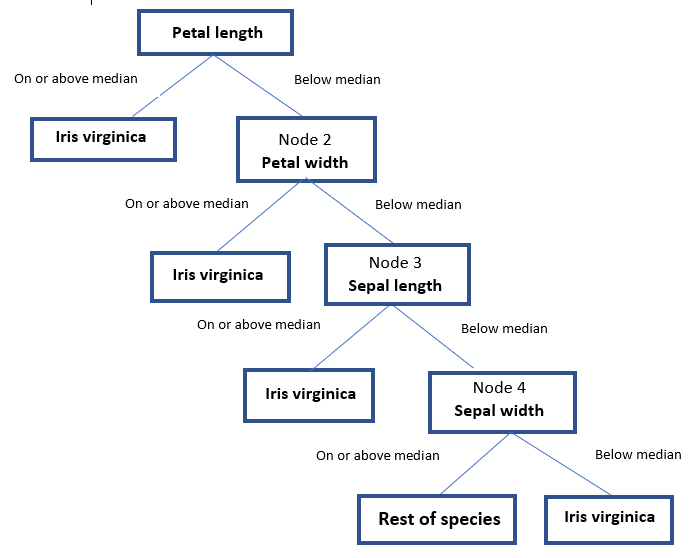

### 9.2 DATA FOR THE DECISION TREE FOR `IRIS SETOSA`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.20525|0.32802|0.21371|0.18723|

As per the weight table, the **fist node** for `Iris setosa` is **petal width** with the smallest Gini of all (0.187).<br>

**Second node** will be the next lowest Gini index, with 0.205, **sepal length**.<br>

**Third node** will be the third lowest Gini index, with 0.213, **petal length**.<br>

The last **fourth node** will be the last Gini index, 0.328, **sepal width**.<br>

Now we take a look at the splits in each of the nodes, using the conditioned probability like with `Iris virginica`, but with `Iris setosa`.<br>

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris s.|0.0|0.4923|0.0|0.0|
|above not Iris s.|1.0|0.5077|1.0|1.0|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris s.|0.6735|0.025|0.66|0.7021|
|below not Iris s.|0.3265|0.975|0.3399|0.2979|

For the **first node**, **petal width**, we have:<br>

- 100% of rows that are above **are not** `Iris setosa`. <br>
- 70% of the rows that are below are `Iris setosa`. <br>

We can say with a high certainty, that this species, `Iris setosa`, will be "below the indicator median" in the first node.

For the **second node**, **sepal length**, we have:<br>

- 100% of rows that are above **are not** `Iris setosa`. <br>
- 67% of the rows that are below are `Iris setosa`. <br>

We can say with a high certainty, that this species, `Iris setosa`, will be "below the indicator median" in the second node.

For the **third node**, **petal length**, we have:<br>

- 100% of rows that are above **are not** `Iris setosa`. <br>
- 66% of the rows that are below are `Iris setosa`. <br>

We can say with a high certainty, that this species, `Iris setosa`, will be "below the indicator median" in the third node.

For the **fourth node**, **sepal width**, we have:<br>

- it is difficult to separate the "above" probabilities, as they are 50% of rows `Iris setosa` and 50% not `Iris setosa`. <br>
- 97% of the rows that are below **are not** `Iris setosa`. <br>

We can say with a poor certainty, that this species, `Iris setosa`, will be "above the indicator median" in the fourth node, however, it would be better not to use sepal width as a classification point for this species.

The decision tree will be as follows:

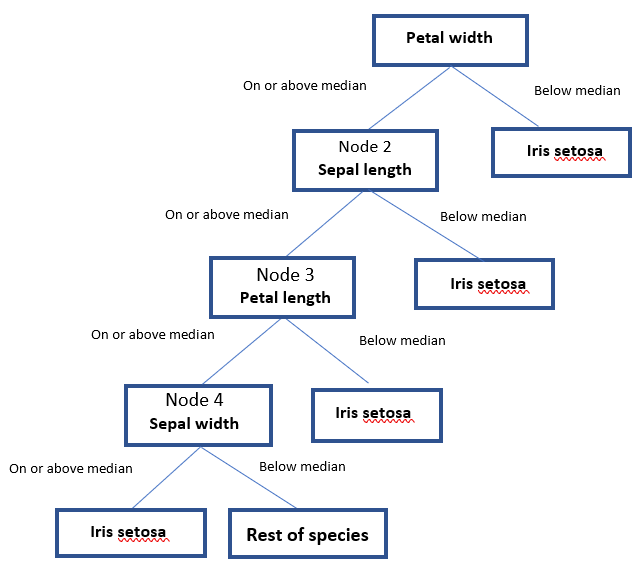

### 9.3 DATA FOR THE DECISION TREE FOR `IRIS VERSICOLOR`

We put together all the **weights of every column** that belong to this species:(Gini Index of the columns)

|Weight|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH|
|------|------------|-----------|------------|-----------|
|Weight|0.4405|0.37256|0.21371|0.4424|

As per the weight table, the **fist node** for `Iris setosa` is **petal length** with the smallest Gini of all (0.213).<br>

**Second node** will be the next lowest Gini index, with 0.37, **sepal width**.<br>

**Third node** will be the third lowest Gini index, with 0.440, **sepal length**.<br>

The last **fourth node** will be the last Gini index, 0.442, **petal width**.<br>

Now we take a look at the splits in each of the nodes, using the conditioned probability like with `Iris virginica`, but with `Iris versicolor`.<br>

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|above Iris ver.|0.375|0.1846|0.3273|0.36207|
|above not Iris ver.|0.625|0.8154|0.6727|0.6379|

|Conditioned Probab|SEPAL LENGTH|SEPAL WIDTH|PETAL LENGTH|PETAL WIDTH| 
|------------------|------------|-----------|------------|-----------| 
|below Iris ver.|0.2857|0.575|0.34|0.2979|
|below not Iris ver.|0.7143|0.425|0.6599|0.7021|

For the **first node**, **petal length**, we have:<br>

- 67% of rows that are above **are not** `Iris versicolor` (33% yes). <br>
- 65.9% of the rows that are below **are not** `Iris versicolor` (34% yes). <br>

We can say with a poor certainty, that this species, `Iris versicolor`, will be "below the indicator median" in the first node. This is very frustrating as it is the first node and we could have two trees, one with the fist node with the species above and another below the indicator.

For the **second node**, **sepal width**, we have:<br>

- 81.5% of rows that are above **are not** `Iris versicolor` ((19% yes). <br>
- 57% of the rows that are below **are** `Iris versicolor`. <br>

We can say with a high certainty, that this species, `Iris setosa`, will be "below the indicator median" in the second node.

For the **third node**, **sepal length**, we have:<br>

- 62% of rows that are above **are not** `Iris versicolor` (38% yes). <br>
- 71% of the rows that are below **are not** `Iris versicolor` (29% yes). <br>

We can say with a poor certainty, that this species, `Iris versicolor`, will be "above the indicator median" in the third node. There is only **9%** probability to split both options, above and below.

For the **fourth node**, **petal width**, we have:<br>

- 36% of rows that are above **are** `Iris versicolor`. <br>
- 29.7% of the rows that are below **are** `Iris versicolor`. <br>

Like with the third node, the difference in probability between both options above and below is very small (**7%** of difference). There is a poor certainty that this species, `Iris versicolor`, will be "above the indicator median", it could be also below the indicator.

The decision tree will be as follows:

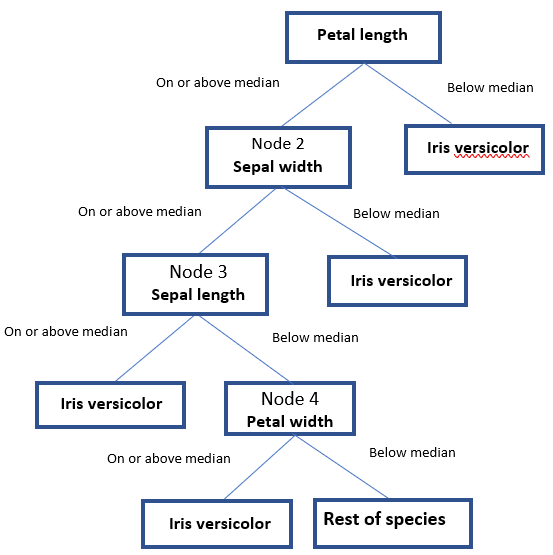

### Exercise 10 - EFFICIENCY OF THE DECISION TREES

In order to know the efficiency of a decision tree, we calculate the percentage of our successes (number of rows of the given species in the test set that matches with the same species name in the train set) and failures.<br>

For example, for `Iris virginica`, we obtained from our train set, that the species can be recognize from the others if: <br>

- first we separate the species by petal length and take the ones that are above the median of petal length.<br>
- after the first separation, we separate the remnant columns by petal width and take the rows with values above the median of petal width.<br>
- finally, we separate the remnant columns by sepal lenght and and take the rows with values over the median of sepal length.<br>

This is repeated in the test set and both number of rows are compared. The higher the number of coincidences, better the model.<br>

#### Test efficiency of the decision tree for `Iris virginica`.

In [27]:
def predict_species(df):
# RETURN None if petal-length is below pl_decision_line or if petal-width is below pw_decision_line, otherwise return 
# 'Iris-virginica'
  if df['petal-length'] >= pl_indicator:
    if df['petal-width'] >= pw_indicator:
        if df['sepal-length'] >= sl_indicator:
           # if df['petal-width'] <= pw_indicator:
           #     return "Iris-virginica"
           # else:
           #     return None
            return "Iris-virginica"
        else:
            return None
    else:
        return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.23333333333333334


The efficiency of classification of `Iris virginica` is 23.4% with 3 nodes. Including all the nodes, the efficiency is 0%.

#### Test efficiency of the decision tree for `Iris setosa`.

In [29]:
def predict_species(df):
# RETURN None if petal-width is below pw_decision_line or if petal-length is below pl_decision_line, otherwise return 
# 'Iris-setosa'
  if df['petal-width'] <= pw_indicator:
    if df['sepal-length'] <= sl_indicator:
        if df['petal-length'] <= pl_indicator:
            if df['sepal-width'] >= sw_indicator:
                return "Iris-setosa"
            else:
                return None
            #return "Iris-setosa"
        else:
            return None
    else:
        return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.43333333333333335


The efficiency of classification of `Iris setosa` is 46.7% with 3 nodes. If we included all the nodes, the efficiency is 43.4%, which is quite similar.

#### Test efficiency of the decision tree for `Iris versicolor`.

In [35]:
def predict_species(df):
# RETURN None if petal-width is below pw_decision_line or if petal-length is below pl_decision_line, otherwise return 
# 'Iris-versicolor'
  if df['petal-length'] <= pw_indicator:
    if df['sepal-width'] <= sl_indicator:
        #if df['sepal-length'] >= pl_indicator:
            #if df['petal-width'] >= pw_indicator:
            #    return "Iris-versicolor"
            #else:
            #    return None
            #return "Iris-versicolor"
        #return None
        return "Iris-versicolor"
    else:
        return None

# use the predict_species(df) function to predict the species, count how many are predicted correct and use this to calculate
# the proportion correct
correct = 0
test_size = test.shape[0]
for i in range(0, test_size):
    species = predict_species(test.iloc[i])
    if species == test.iloc[i]['species']:
        correct += 1

print ("Proportion correctly identified", correct / test_size) 

Proportion correctly identified 0.0


The efficiency of classification of `Iris versicolor` is 0%. All combinations return the same %.

This model does not work well, because some individuals of `Iris versicolor` have petals or sepals that match within the sizes of `Iris virginica` and both species overlap a little. The plot graph below gives us how much our data is spread / overlapped.

### Exercise 11 - PLOT GRAPH

#### For the petals we have:

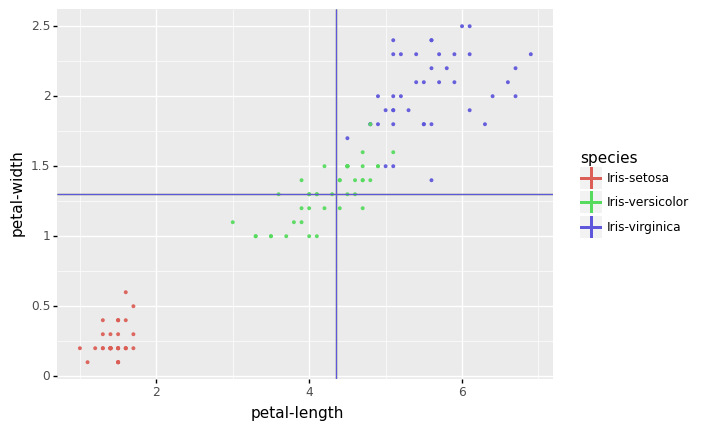

<ggplot: (151692409143)>

In [38]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='petal-length', y='petal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=pl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=pw_indicator, color='species'))
)

`Iris setosa` is clearly at the bottom of the graph, with small petals. `Iris virginica` is clearly at the top, with big petals. `Iris versicolor` is in the middle, with a certain tendency to overlap with the individuals of `Iris virginica` that have small petals.<br>

The bold lines show the median indicators for the measures of the petals. They separate the graph in two very different parts, one for `Iris setosa` and the other for `Iris virginica`, while `Iris versicolor` cannot be assigned to any specific quadrant.

#### For the sepals we have:

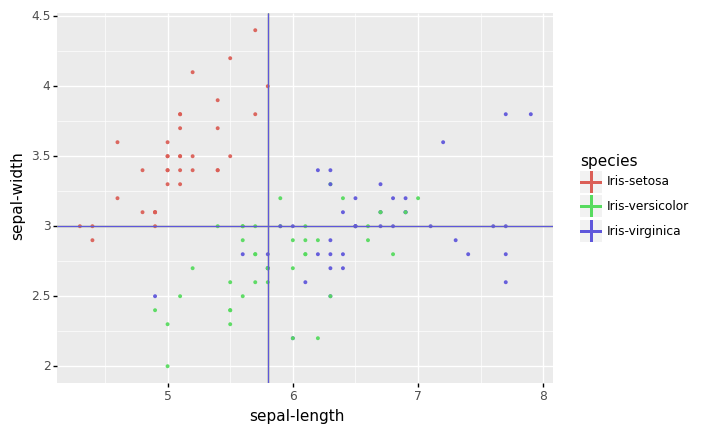

<ggplot: (151692654644)>

In [40]:
import plotly
import ggplot
from pandas import Timestamp
from plotnine import *
import warnings
warnings.filterwarnings('ignore', module='plotnine') 

(ggplot(train, aes(x='sepal-length', y='sepal-width', color='species')) + 
        geom_point(alpha =0.9, size = 0.6) +
        geom_vline(train, aes(xintercept=sl_indicator, color='species')) +
        geom_hline(train, aes(yintercept=sw_indicator, color='species'))
)

The sepal data is more widespread. It looks clear that `Iris setosa` has the shortest and widest sepals, while the other two species have all the lengths whithin a range of 2 to 4 cm in width. This information is useful to classify `Iris setosa` but it is not useful for the other species, which decisions trees will be affected.<br>

The bold lines show the median indicators for the sepal measures. `Iris setosa` can be clearly identified, while the other two overlap completely.

### CONCLUSION

I have used the median of every column (petal length and width, sepal length and width) and a train/test ratio of 80-20.

From these results, the measures of the petals can be used to differentiate between the species of Iris, however sepal lenght is not useful for this and sepal width can only be used for `Iris setosa`.